[Reference](https://levelup.gitconnected.com/dask-for-scalable-data-science-a-practical-exploration-6cf1dd9dce64)

In [1]:
pip install dask

In [2]:
import pandas as pd
import numpy as np

def create_dataset(num_rows):
    # Generate data
    data = {
        "Product_ID": [f"P{str(i).zfill(4)}" for i in range(1, num_rows + 1)],
        "Category": np.random.choice(["Electronics", "Clothing", "Home Appliances", "Books", "Toys"], size=num_rows),
        "Brand": np.random.choice(["BrandA", "BrandB", "BrandC", "BrandD", "BrandE"], size=num_rows),
        "Store_Location": np.random.choice(["New York", "Los Angeles", "Chicago", "Houston", "Miami"], size=num_rows),
        "Stock_Status": np.random.choice(["In Stock", "Out of Stock", "Backorder"], size=num_rows),
        "Shipping_Option": np.random.choice(["Standard", "Express", "Two-Day", "Overnight"], size=num_rows),
        "Customer_Rating": np.random.uniform(1, 5, size=num_rows).round(2),
        "Warranty_Years": np.random.choice([1, 2, 3, 5], size=num_rows),
        "Product_Weight_kg": np.random.uniform(0.5, 25, size=num_rows).round(2),
        "Sales_Volume": np.random.randint(100, 1000000, size=num_rows),
        "Return_Rate": np.random.uniform(0.01, 0.20, size=num_rows).round(2),
        "Profit_Margin": np.random.uniform(5.00, 50.00, size=num_rows).round(2),
        "Average_Delivery_Days": np.random.randint(1, 30, size=num_rows),
        "Supplier_Distance_km": np.random.uniform(50, 10000, size=num_rows).round(2),
        "Manufacturing_Cost": np.random.uniform(10, 500, size=num_rows).round(2),
        "Discount_Rate": np.random.uniform(0, 0.30, size=num_rows).round(2),
        "Year_Released": np.random.randint(2000, 2023, size=num_rows),
        "Price": np.random.uniform(20, 2000, size=num_rows).round(2),
        "Market_Share": np.random.uniform(0.01, 0.50, size=num_rows).round(2),
        "Product_Age_Days": np.random.randint(1, 1000, size=num_rows)
    }
    df = pd.DataFrame(data)
    return df

In [4]:
from dask.distributed import Client

client = Client(n_workers=8)  # Start a cluster with 8 workers
# client = Client('127.0.0.1:8786')  # Connect to a specific scheduler

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46657 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:34857
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:46657/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42857'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43885'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37227'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35641'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43427'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42881'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:41553'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40107'
INFO:distributed.scheduler:Register 

In [5]:
import dask.array as da

dask_array = da.random.random(size=(100000, 100000), chunks=(10000, 10000))
dask_array

dask.array<random_sample, shape=(100000, 100000), dtype=float64, chunksize=(10000, 10000), chunktype=numpy.ndarray>

In [6]:
%%time
dask_sum = dask_array.sum()

dask_sum_computed = dask_sum.compute()
dask_sum_computed

CPU times: user 8.6 s, sys: 1.76 s, total: 10.4 s
Wall time: 1min 22s


5000001669.624279

In [7]:
def eager_evaluation(numbers):
    squared_numbers = [x**2 for x in numbers]
    return squared_numbers

numbers = [1, 2, 3, 4, 5]
squared = eager_evaluation(numbers)
print("Eager Evaluation:", squared)

Eager Evaluation: [1, 4, 9, 16, 25]


In [8]:
def lazy_evaluation(numbers):
    for x in numbers:
        yield x**2

numbers = [1, 2, 3, 4, 5]
lazy_squared = lazy_evaluation(numbers)
print(lazy_squared)

# <generator object lazy_evaluation at 0x104aba0c0>

print("Lazy Evaluation:")
for number in lazy_squared:
    print(number)

<generator object lazy_evaluation at 0x78bc686487b0>
Lazy Evaluation:
1
4
9
16
25


In [9]:

from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [10]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 295 ms, sys: 55.1 ms, total: 350 ms
Wall time: 3 s


In [11]:
from dask import delayed

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

print(z)

Delayed('add-963113f5-fec2-49e3-844e-610df5b69122')


In [12]:
%%time

result = z.compute()

CPU times: user 214 ms, sys: 51.1 ms, total: 265 ms
Wall time: 2.07 s


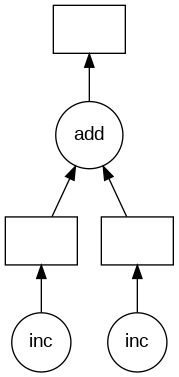

In [13]:
z.visualize()

In [14]:
datasets = list(range(1,9))

results = []
for data in datasets:
    result = delayed(inc)(data)
    results.append(result)
total = delayed(sum)(results)
total

Delayed('sum-3fd9b37d-e5e1-4cc3-b586-be595ede3c3b')

In [15]:
%%time
total.compute()

CPU times: user 122 ms, sys: 24.7 ms, total: 147 ms
Wall time: 1.07 s


44

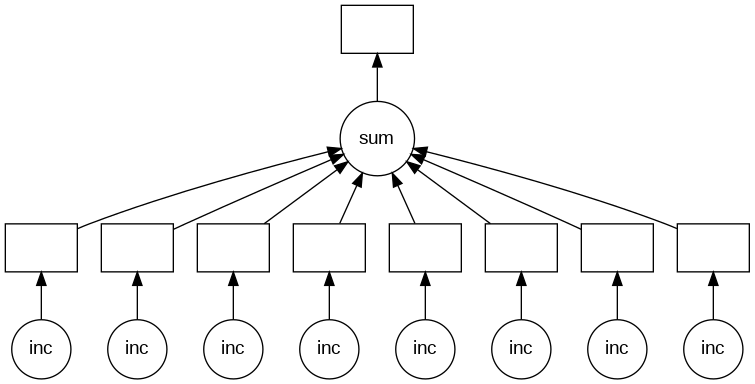

In [16]:
total.visualize()

In [17]:
@delayed
def square(num):
    sleep(1)
    return num * num

@delayed
def sum_list(numbers):
    sleep(1)
    return sum(numbers)

In [18]:
data = [1, 2, 3, 4, 5]

squared_data = [square(x) for x in data]

total = sum_list(squared_data)
total

Delayed('sum_list-d7fda052-f733-4be1-87dc-f5cf7a651551')

In [19]:
%%time
result = total.compute()
result

CPU times: user 227 ms, sys: 37.4 ms, total: 264 ms
Wall time: 2.05 s


55

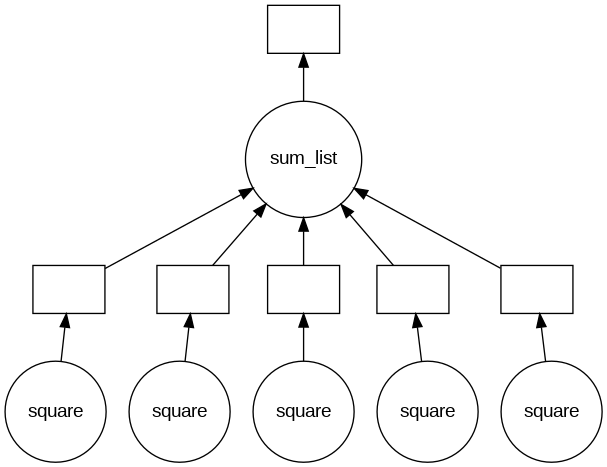

In [20]:
total.visualize()

In [21]:
from dask.distributed import Client

client = Client(n_workers=4)

def square(x):
    return x * x

future = client.submit(square, 4)
future

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35715 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:34243
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:35715/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37099'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39031'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42145'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34509'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37109', name: 2, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37109
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38334
INFO:distributed.scheduler:Reg

<Future: pending, key: square-027326524b1664965c7095194c300da8>

In [22]:
result = future.result()
print(result)

16


In [23]:
values = [1, 2, 3, 4, 5]

futures = [client.submit(square, value) for value in values]
futures

[<Future: pending, key: square-1b0b5f637204f6dc67756fd258c5c19c>,
 <Future: pending, key: square-9e8e139938c641ed8ddd24ade28364ff>,
 <Future: pending, key: square-7bccf8d54a99c1aacc347a814f74d6d7>,
 <Future: finished, type: int, key: square-027326524b1664965c7095194c300da8>,
 <Future: pending, key: square-56a318add235e87f9f9e177260c314b1>]

In [24]:
results = client.gather(futures)
print(results)

[1, 4, 9, 16, 25]


In [25]:
import random

def add_random_number(a):
    return a + random.randint(1, 100)
future3 = client.submit(add_random_number, 5, pure=False)
future4 = client.submit(add_random_number, 5, pure=False)

# Check if the futures point to the same computation
print(future3.key == future4.key)  # Output: False

False


In [26]:
def add_numbers(a, b):
    return a + b

future1 = client.submit(add_numbers, 4, 5, pure=True)
future2 = client.submit(add_numbers, 4, 5, pure=True)

# Check if the futures point to the same computation
print(future1.key == future2.key)  # Output: True

True


In [27]:
def square(x):
    return x * x

futures = client.map(square, range(1, 9))

res = client.gather(futures)
res

[1, 4, 9, 16, 25, 36, 49, 64]

In [29]:
from dask.distributed import as_completed
# Define a simple task function
def my_task(x):
    # Some computations
    return x * 2

# Submit multiple tasks
futures = [client.submit(my_task, i) for i in range(5)]

# Create an as_completed iterator
completed_futures = as_completed(futures)

# Process each future as it completes
for future in completed_futures:
    result = future.result()
    print("Task completed with result:", result)

client.close()

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:37099'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:39031'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:42145'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34509'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:38350; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:38338; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:38334; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:45805', name: 0, status: closing, memory: 3, pro

Task completed with result: 0
Task completed with result: 2
Task completed with result: 4
Task completed with result: 6
Task completed with result: 8


INFO:distributed.scheduler:Scheduler closing due to unknown reason...
INFO:distributed.scheduler:Scheduler closing all comms
